# Introduction

Let's assume for our study of 60 participants and their preferences between 2 websites that they were all stakeholders in the design of the site. And we've excluded people familiar with the old site. So they're either going to get version A or B, or perhaps we're delivering it to the client of our design firm. So they haven't seen either versions so they're going in to each fresh. 

And we'll find out that preference in the end. Now, the consideration, and we'll return to this later is...do we want to make sure that people are exposed half to one website and half to the other website first? It accounts for any order effects that might take place between the 2 sides. 

They give us a preference at the end of their time. Let's say, we give them 20 minutes on each site. Let's make it open and not task-driven. They can just explore and use the site, and give us their preference. The statistical and experimental question is, based on the preferences we gather, is there a significant difference in the preference for one site or the other?

In [17]:
library("dplyr")

In [18]:
prefsAB <- read.csv("materials/prefsAB.csv")
head(prefsAB)

Subject,Pref
1,B
2,B
3,B
4,B
5,B
6,B


    Subject   Pref  
 1      : 1   A:14  
 2      : 1   B:46  
 3      : 1         
 4      : 1         
 5      : 1         
 6      : 1         
 (Other):54         

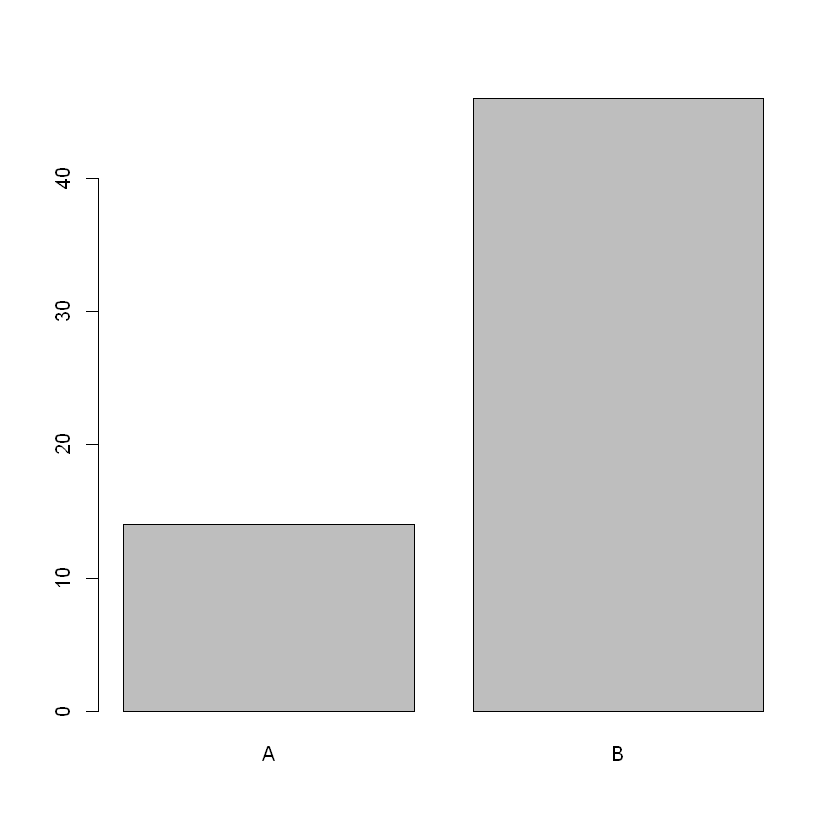

In [26]:
prefsAB$Subject <- factor(prefsAB$Subject) # convert to categorical datatype
(summary(prefsAB))
plot(prefsAB$Pref)

# Test of proportions | Chi-Squared Test

60 people giving us their preference for which website they liked best. This is a one sample test of proportions. That's its formal name. A test of proportion is where you're looking at a proportion of responses. If you find yourself counting subjects themselves, for example, each subject gives their preference, then you may be doing a test of proportions. It's called a one sample because we havea a sample of their preference. So on one variable preference, we have proportions whether they liked website A or B. So that's a one sample test. 

We're going on to a Pearson Chi Square test. This is a one sample test of proportions. 

In [24]:
# Pearson chi-square test
(prfs <- xtabs(~ Pref, data = prefsAB))
(chisq.test(prfs))

Pref
 A  B 
14 46 


	Chi-squared test for given probabilities

data:  prfs
X-squared = 17.067, df = 1, p-value = 3.609e-05


Here's the output, chi squared tests for given probabilities. Chi squared, that's an X but it's the chi symbol, is 17. That's the value of the statistic. The degrees of freedom are one and the P value is very small (near zero). What does this all mean? 

Each statistical test has a statistic associated with it. Along with chi squared, we'll see the t-test, f-test, and perhaps some others. And the value of those statistics is related to the distribution that the statistic is calculated over. The chi-squared distribution in this case. What's important for our purposes is just to understand what it means if you get a significant result and how to write that. This result is in fact significant because the p-value is less than 0.05. And traditionally taken to be the threshold at which we would pronouce the results to be statistically significant. So clearly, we're very small here, much less than 0.05. 

At this point, we know there is in fact a statistically significant difference in the preferences for web B (the redesign) over website A (the older site). 

### Important point about non-significant results

Significant results tell us there is a statistically significant difference between things we're comparing. But a non-significant result does not tell us there's no difference between things we're comparing. In fact, it only tells us that there was not a detectable difference with the data that we had. Whether there's a real difference depends only on the data we analyzed. And a non-significant result may just mean that we didn't have enough data to detect a differnce. It doesn't mean that 2 things are equal or that they're the same. It just means that we couldn't detect any difference. So the result was no detectably different. The factors were not detectably different. They were non-significantly difference. That's not the same thing as they're the same. So keep that in mind. That's a very important point when you're interpreting and reporting these kinds of results. 

# Exact test | Binomial Test

Let's do a similar test as chi-squared but has an important difference. It's an exact test and it's formally called the binomial test. The chi-squared test, the one-sampled chi squared test, is an asymptotic test. And that means it's approximately the p-value that we get. And it works better and better the more data points that it has, the more samples. In fact, some people argue that maybe a chi-squared test isn't good to use unless you have 1000 data points or more. We certainly have less than that (60). 

So we can use an exact test, which is more computationally intensive to calculate but gives us the exact p-value. The binomial test does that. 

In [27]:
# binomial test
binom.test(prfs)


	Exact binomial test

data:  prfs
number of successes = 14, number of trials = 60, p-value = 4.224e-05
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.1338373 0.3603828
sample estimates:
probability of success 
             0.2333333 


It gives us the data output and the p-value is also very very small. There's clearly a strong preference for website B over website A. It gives us some other output as well but for our purposes, we won't worry about that yet. So that's the binomial test. We report that simply by writing that we had a binomial test with 60 data points and then report the p-value. 

# Tests for one sample and more than 2 response variables

We've done a test for one sample with 2 response categories. That's using the one sample chi-squared test and the binomial test. What if there are more than 2 response categories? Well, we can still use a one sample chi-squared test but if we want an exact test, we need to go away from the binomial test which can only handle 2 response categories, into something called the multinomial test. 

In [29]:
# read in data with 3 response categories

prefsABC <- read.csv("materials/prefsABC.csv")
head(prefsABC)

Subject,Pref
1,C
2,C
3,B
4,C
5,C
6,B


    Subject   Pref  
 1      : 1   A: 8  
 2      : 1   B:21  
 3      : 1   C:31  
 4      : 1         
 5      : 1         
 6      : 1         
 (Other):54         

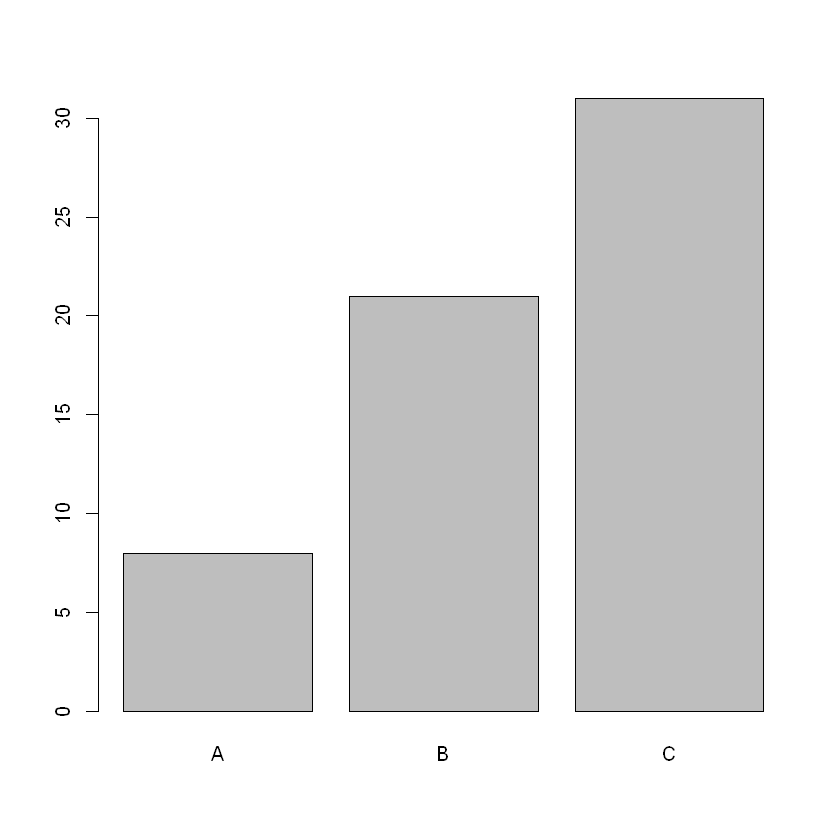

In [30]:
prefsABC$Subject <- factor(prefsABC$Subject) # convert to factor
summary(prefsABC)
plot(prefsABC$Pref)

In [33]:
# pearson chi-square test
(prfs <- xtabs(~Pref, data=prefsABC))
(chisq.test(prfs))

Pref
 A  B  C 
 8 21 31 


	Chi-squared test for given probabilities

data:  prfs
X-squared = 13.3, df = 2, p-value = 0.001294


We can see here the result now has 2 degrees of freedom, not just 1. Because we have 3 response categories and so the degrees of freedom for a chi-squared test of this kind are the number of response categories minus one. We can also see that our p-value is indeed significantly less than 0.05. Here, I've added the chi squared test result for our 3 response category data. The chi-squared statistic is 13.30 and it us a p-value of less than 0.01. So that's how we'd report that second result. So that's our asymptotic test. 

The multinomial test that we mentioned is an exact test and for that we're going to load in the XNomial library. 

In [54]:
library("XNomial")

The x multifunction gives us a test over a set of probabilities here. We're testing over the preferences we have. The c function just creates a list. So we can pass in a list of values that are the probabilities if there were no preferences. And that would be a third of the respondents would be for each category A, B, and C. If there was no preference for any of the websites, we'd expect a third of the people to like each of them. And then this function has various ways to calculate the probability and that comes through statname. 

In [55]:
xmulti(prfs, c(1/3, 1/3, 1/3), statName="Prob")


P value (Prob) = 0.0008024


We can see that it gives us a p-value of less than 0.05. That's the exact p-value. So we'd expect a difference, given those proportions. Now, what that tells us, is there is a difference between some levels of numbers, of A, B, and C. It doesn't actually tell us what the difference is between A and B, B and C, or A and C. Those pair-wise differences are what are called post-hoc tests of post-hoc pairwise comparisions. 

They're post-hoc in the sense that they follow a statistically significant overall or what's called omnibus test. We just did that omnibus test (with the mulinomial test). If we want to know about the comparision of the separate differences, well then we can go ahead and run post-hoc binomial tests. Binomial again in the sense that we're just back to testing each of them against a hypothesized probability. 

In [59]:
NumA <- sum(prefsABC$Pref == "A")
NumB <- sum(prefsABC$Pref == "B")
NumC <- sum(prefsABC$Pref == "C")
TotalNum <- nrow(prefsABC)

We're summing over the rows that have a preference for A and comparing those against all the rows in the table. And comparing that against what would be a chance probability of 1/3. And we're doing that for all A, B, and C levels, to see which ones are significantly different from chance. So, we're going to store all those results in aa, bb, and cc. 

In [60]:
# post hoc binomial tests with correction for multiple comparisions
(aa <- binom.test(NumA, TotalNum, p=1/3))
(bb <- binom.test(NumB, TotalNum, p=1/3))
(cc <- binom.test(NumC, TotalNum, p=1/3))


	Exact binomial test

data:  NumA and TotalNum
number of successes = 8, number of trials = 60, p-value = 0.0005533
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.05936442 0.24592222
sample estimates:
probability of success 
             0.1333333 



	Exact binomial test

data:  NumB and TotalNum
number of successes = 21, number of trials = 60, p-value = 0.7852
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.2313264 0.4840280
sample estimates:
probability of success 
                  0.35 



	Exact binomial test

data:  NumC and TotalNum
number of successes = 31, number of trials = 60, p-value = 0.003723
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.3839460 0.6476871
sample estimates:
probability of success 
             0.5166667 


# Bonferroni Correction

Then we're going do do what's called an adjustment. Now, this adjustment needs a little bit of explanation. When we're testing statistical tests and we say that if p is less than 0.05, there's a significant result, that means that there's 1 in 20 chance that just by chance, we might think there's a statistically significant outcome, when in fact it's just by chance. That's what being at 0.05 means, a 1 in 20 chance for that. And so if we're doing what are multiple comparisions, if we were to do 20 of them, we'd expect 1 just by chance to become significant. 

So we have to adjust for that. And we do that with a Bonferroni Correction. This method here is called "holm", which is really the preferred one. It subsumes Bonferroni but it's a little bit less of a strict test. It's a sequential test that adjusts each of the p values according to just how low it is. The 1st p-value is in this case with 3 test multiplied by 3, so increased 3 times. The 2nd is doubled and the highest one is left as is. If at any point one of those is not less than 0.05 then that sequence stops. This is called Holm's sequential Bonferroni procedure. 

Anytime we're doing multiple tests, we'd have to correct in this fashion.

In [58]:
(p.adjust(c(aa$p.value, bb$p.value, cc$p.value), method="holm"))

[1] 0.001659954 0.785201685 0.007446980

We can see now that we have a significant result for A. It's significantly different from chance from 1/3. People didn't like it as it only had 8 preferences. The preference for B was 21, which was near chance. And then the preference for C was 31, which was was more than half the participants. So that tells us that they're significantly different from chance for those individual ones. We see than A was lower and C was higher. 

# Two-sample tests of proportions

Now we can ask, what happens if we have more than 1 sample? What happens if we have a couple ways in which our participants are sampled, maybe for their preferences but also say for their sex (male or female)? We could ask, is there a difference in what males prefer to what females prefer with respect to these website preferences that we're testing. 

Also within those samples, might we not have more than 2 response cateogies possible? So for these, we're going to need 2 sample tests of proportions. Or in general, an end sample test to proportion. And we can go through there here when we revisit our data file that had preferences for website A or B. 

But now, we also add to that the sex of the respondent, whether they were male or female. 

In [61]:
# Two-sample tests of proportions

prefsABsex <- read.csv("materials/prefsABsex.csv")
head(prefsABsex)

Subject,Pref,Sex
1,B,F
2,B,F
3,B,F
4,B,M
5,B,F
6,B,M


In [62]:
prefsABsex$Subject <- factor(prefsABsex$Subject) # convert to factor
(summary(prefsABsex))

    Subject   Pref   Sex   
 1      : 1   A:14   F:31  
 2      : 1   B:46   M:29  
 3      : 1                
 4      : 1                
 5      : 1                
 6      : 1                
 (Other):54                

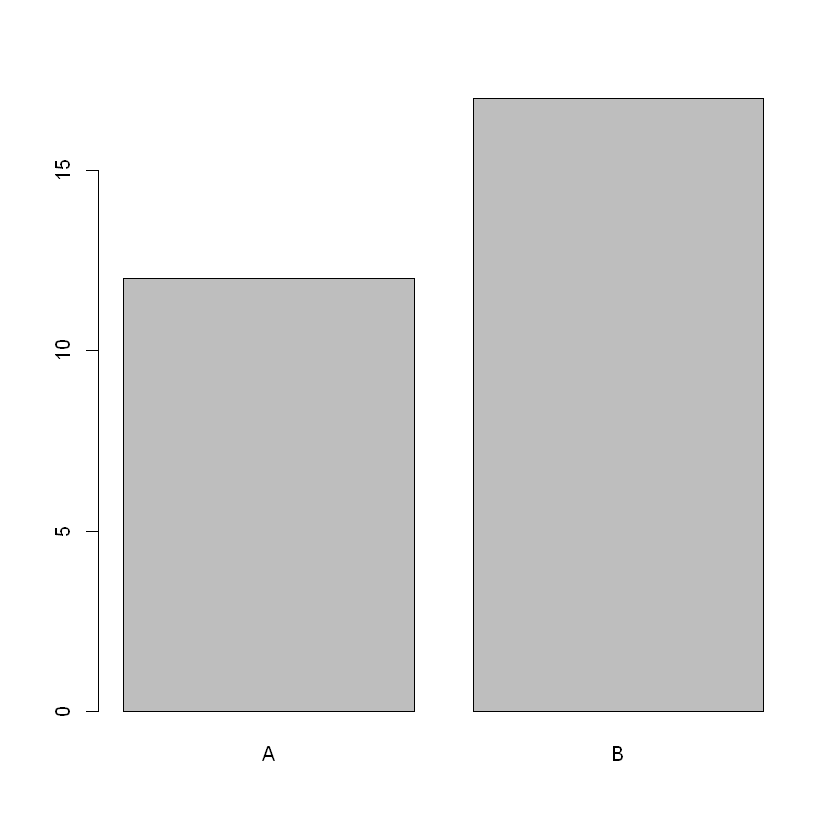

In [74]:
males <- prefsABsex[prefsABsex$Sex == "M", ]
plot(males$Pref)

Males seem to prefer website B more. Of course, we don't know if that's statistically significant. 

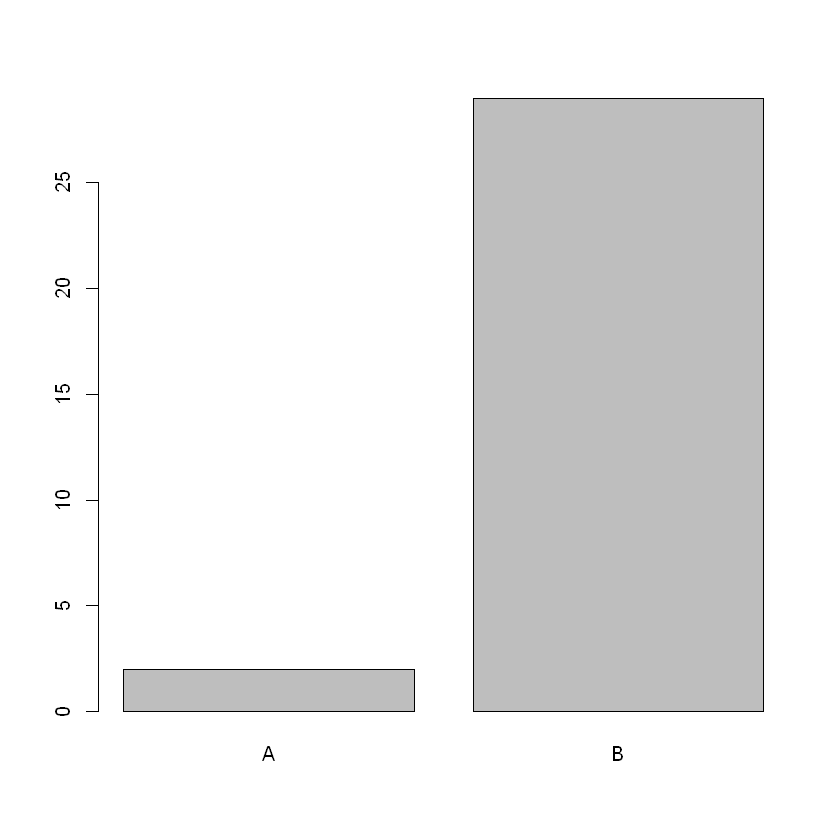

In [76]:
females <- prefsABsex[prefsABsex$Sex == "F", ]
plot(females$Pref)

There was a pretty dramatic drop in their preference for website A there, and that would be certainly very interesting to find. Maybe there's something about it that doesn't make females happy about the design or it's less usable for some reason. Of course, that would be pretty interesting to find. So we can do our Pearson Chi Square test, now it's a two sample test to proportions. 

In [70]:
# Pearson chi-square test
(prfs <- xtabs(~Pref + Sex, data=prefsABsex)) # the '+' sign indicates 2 vars
chisq.test(prfs)

    Sex
Pref  F  M
   A  2 12
   B 29 17


	Pearson's Chi-squared test with Yates' continuity correction

data:  prfs
X-squared = 8.3588, df = 1, p-value = 0.003838


Here, we see that the result is statistically significant. And what that tells us again is just that there are some difference here. We'd need to follow up with a further analysis if we wanted to see exactly where those difference lay. From the graphs, we can pretty easily tell that the difference is strong in large part because of the females lack of preference for website A. 

Now another test that's catching on and becoming more popular is the G-Test. It's like the chi-square test.  It's also an asymptotic test as well. But it's meant to be more accurate and it's more of a kind of newer version of a similar thing. 

In [80]:
# G-test, asymptotic like chi-square
library(RVAideMemoire)
G.test(prfs)


	G-test

data:  prfs
G = 11.025, df = 1, p-value = 0.0008989


We can see that it produces a similar result to what we've seen before with a 2 sample chi square test. Now there's also an exact test, just like we used the binomial test in the past and the multinomial test but those only work for one sample. 

We can use Fishers' exact test. Originally developed for 2 by 2 tests like we have here but actually can be generalized to kind of r by c (row by column) of any number becomes somewhat computationally intensive as those grow but for most of the kinds of tests you would be looking at, if you have a small number of samples, then this will work well. The R version of this test is already generalized to be on just 2 by 2 tables. So we can run Fisher's exact test as well and get some output there. 

In [81]:
# Fisher's exact test
fisher.test(prfs)


	Fisher's Exact Test for Count Data

data:  prfs
p-value = 0.001877
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.009898352 0.537050159
sample estimates:
odds ratio 
 0.1015763 


All of those are alternatives to looking at ways of analyzing a 2 sample test. 

# 2 sample, more than 2 response categories

Now what happens again if we have a 3 response categories? Well...here again, we can go back to our data with 3 response categories. 

In [84]:
# revisit our data file with 3 response categories, but now with sex (M/F)
prefsABCsex <- read.csv("materials/prefsABCsex.csv")
head(prefsABCsex)

Subject,Pref,Sex
1,C,F
2,C,M
3,B,M
4,C,M
5,C,M
6,B,F


In [85]:
prefsABCsex$Subject <- factor(prefsABCsex$Subject) # convert to nominal factor
summary(prefsABCsex)

    Subject   Pref   Sex   
 1      : 1   A: 8   F:29  
 2      : 1   B:21   M:31  
 3      : 1   C:31         
 4      : 1                
 5      : 1                
 6      : 1                
 (Other):54                

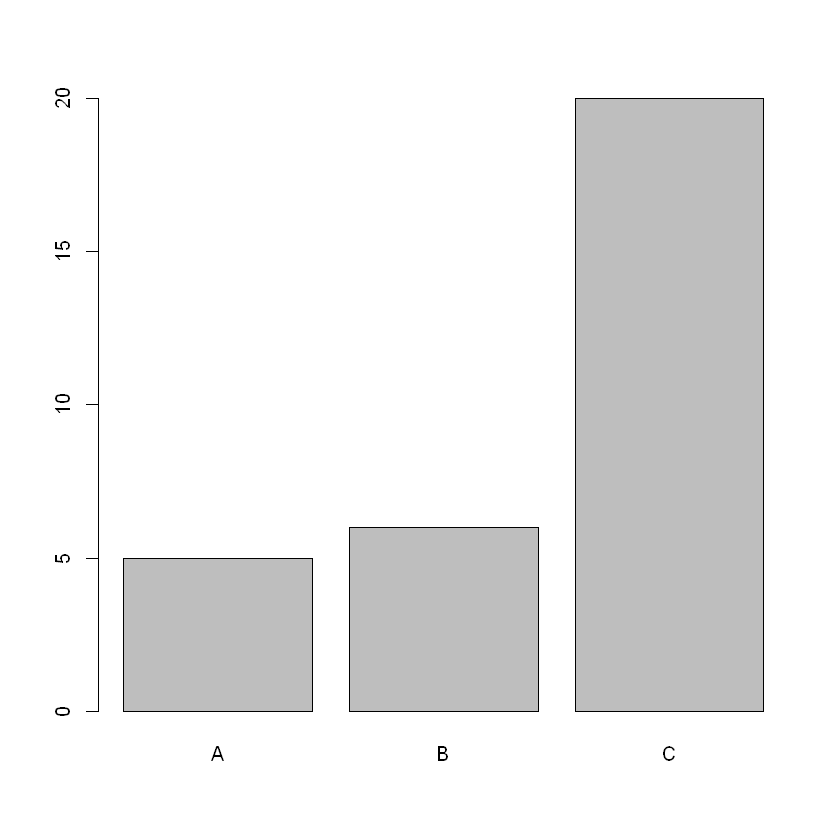

In [86]:
males <- prefsABCsex[prefsABCsex$Sex == "M",]
plot(males$Pref)

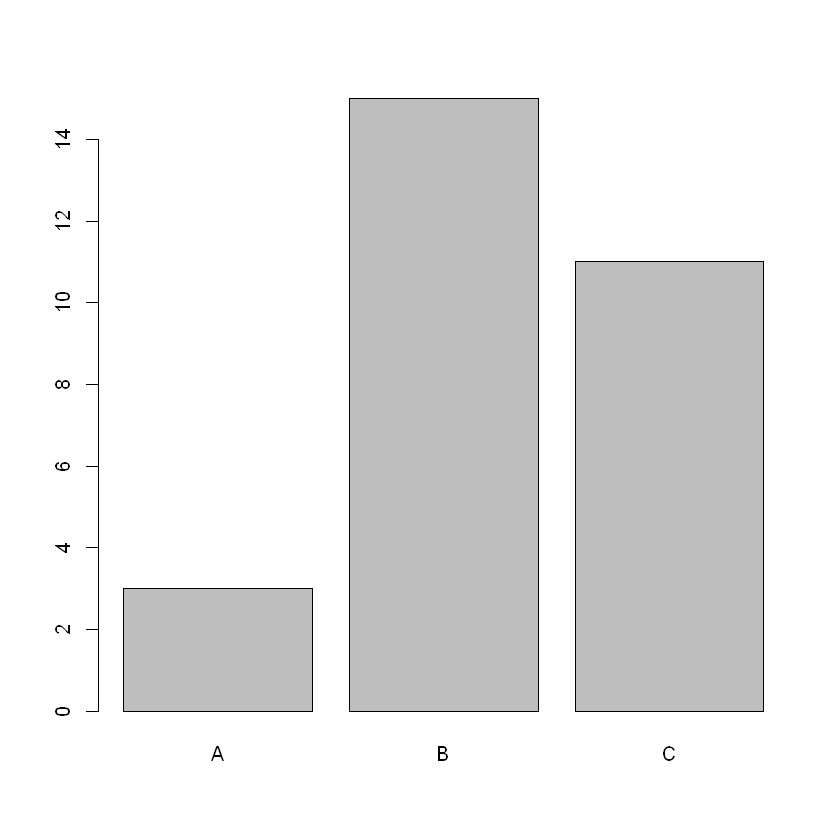

In [87]:
females <- prefsABCsex[prefsABCsex$Sex == "F",]
plot(females$Pref)

In [91]:
(prfs <- xtabs( ~ Pref + Sex, data=prefsABCsex))
chisq.test(prfs)

    Sex
Pref  F  M
   A  3  5
   B 15  6
   C 11 20

Warning message in chisq.test(prfs):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  prfs
X-squared = 6.9111, df = 2, p-value = 0.03157


We get a warning here because the chi-squared test is not an exact test.

In [89]:
# G-test
G.test(prfs)


	G-test

data:  prfs
G = 7.0744, df = 2, p-value = 0.02909


In [90]:
# Fisher's exact test
fisher.test(prfs)


	Fisher's Exact Test for Count Data

data:  prfs
p-value = 0.03261
alternative hypothesis: two.sided


# Post-Hoc test for 2 sample proportions

The tests before only tells us that there's some difference in the table but if we want to look further, we can see where those differences lie. So we can run this post-hoc binomial tests to see how much do the responses differ by chance? We can see for this that within we can test within males and within females, and we can see the preferences within males for A, B, and C website, and within females for A, B, and C website against all their rows. 

And then, we'll do a post-hoc adjustment for each of those p-values by the home sequential Bonferroni procedure. An adjustment for multiple comparisons. 

In [95]:
# manual post hoc binomial tests for (m)ales -- do any prefs for A-C sig. differ from chance for males?
num_Males_A <- sum(prefsABCsex[prefsABCsex$Sex == "M",]$Pref == "A")
num_Males_B <- sum(prefsABCsex[prefsABCsex$Sex == "M",]$Pref == "B")
num_Males_C <- sum(prefsABCsex[prefsABCsex$Sex == "M",]$Pref == "C")
Total_Males <- nrow(prefsABCsex[prefsABCsex$Sex == "M",])

In [97]:
(ma <- binom.test(num_Males_A, Total_Males, p=1/3))
(mb <- binom.test(num_Males_B, Total_Males, p=1/3))
(mc <- binom.test(num_Males_C, Total_Males, p=1/3))


	Exact binomial test

data:  num_Males_A and Total_Males
number of successes = 5, number of trials = 31, p-value = 0.05474
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.05452433 0.33727158
sample estimates:
probability of success 
             0.1612903 



	Exact binomial test

data:  num_Males_B and Total_Males
number of successes = 6, number of trials = 31, p-value = 0.1266
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.0745199 0.3747322
sample estimates:
probability of success 
             0.1935484 



	Exact binomial test

data:  num_Males_C and Total_Males
number of successes = 20, number of trials = 31, p-value = 0.0004323
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.4536956 0.8077326
sample estimates:
probability of success 
             0.6451613 


In [98]:
(p.adjust(c(ma$p.value, mb$p.value, mc$p.value), method="holm")) # correct for multiple comparisons

[1] 0.109473564 0.126622172 0.001296754

A and B were not statistically significant by chance but for website C, they were. And we can go back and look at the counts to see that they preferred C highly. We can do the same for females.

In [99]:
# manual post hoc binomial tests for (f)emales -- do any prefs for A-C sig. differ from chance for females?
num_females_A <- sum(prefsABCsex[prefsABCsex$Sex == "F",]$Pref == "A")
num_females_B <- sum(prefsABCsex[prefsABCsex$Sex == "F",]$Pref == "B")
num_females_C <- sum(prefsABCsex[prefsABCsex$Sex == "F",]$Pref == "C")
Total_Females <- nrow(prefsABCsex[prefsABCsex$Sex == "F",])

In [101]:
# manual post hoc binomial tests for (f)emales -- do any prefs for A-C sig. differ from chance for females?
(fa <- binom.test(num_females_A , Total_Females, p=1/3))
(fb <- binom.test(num_females_B , Total_Females, p=1/3))
(fc <- binom.test(num_females_C , Total_Females, p=1/3))


	Exact binomial test

data:  num_females_A and Total_Females
number of successes = 3, number of trials = 29, p-value = 0.009011
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.02186374 0.27351520
sample estimates:
probability of success 
             0.1034483 



	Exact binomial test

data:  num_females_B and Total_Females
number of successes = 15, number of trials = 29, p-value = 0.04724
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.3253150 0.7055144
sample estimates:
probability of success 
             0.5172414 



	Exact binomial test

data:  num_females_C and Total_Females
number of successes = 11, number of trials = 29, p-value = 0.694
alternative hypothesis: true probability of success is not equal to 0.3333333
95 percent confidence interval:
 0.2068687 0.5773954
sample estimates:
probability of success 
             0.3793103 


In [102]:
p.adjust(c(fa$p.value, fb$p.value, fc$p.value), method="holm") # correct for multiple comparisons

[1] 0.02703274 0.09447821 0.69396951

For females, we see that they were statisically significantly different from chance in their lack of interest in website A but not for B and C. 